# data cleaning

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("netflix1.csv")

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.shape

(8790, 10)

In [24]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [25]:
df.isnull().value_counts()

show_id  type   title  director  country  date_added  release_year  rating  duration  listed_in
False    False  False  False     False    False       False         False   False     False        8790
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['title', 'type', 'rating'], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])

<Axes: >

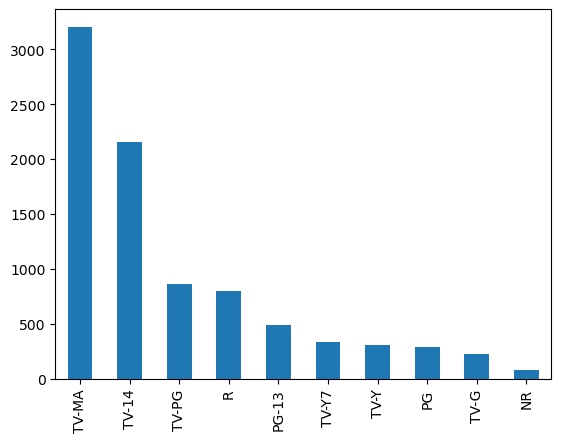

In [26]:
year = df.rating.value_counts()
year[:10].plot(kind = 'bar')

In [11]:
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
for col in df.select_dtypes(include=['number']):
    df[col].fillna(df[col].median(), inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


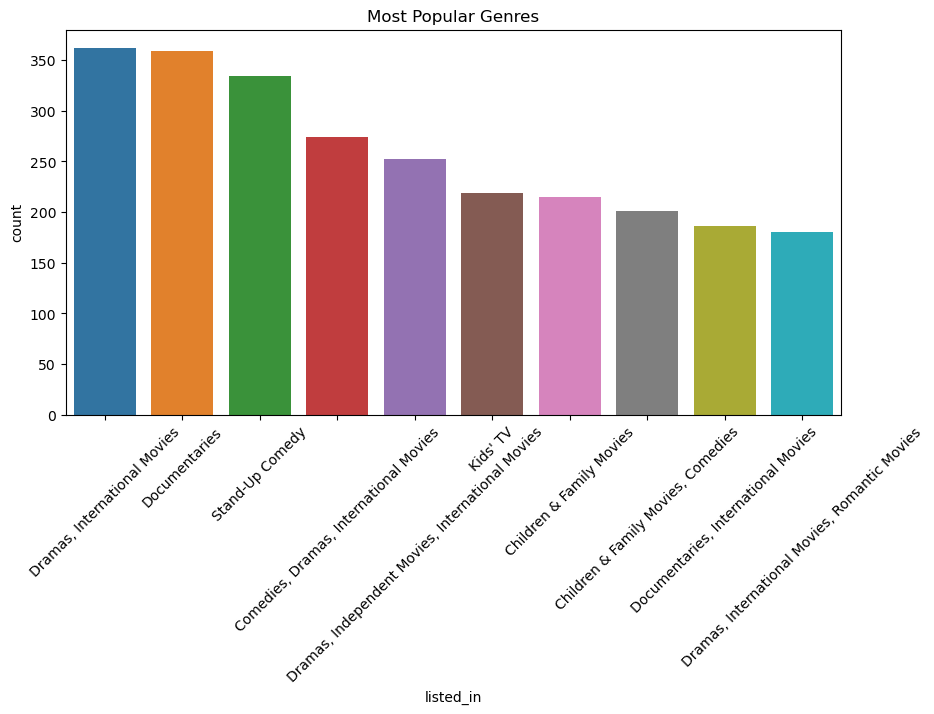

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='listed_in', data=df, order=df['listed_in'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Most Popular Genres")
plt.show()

<Axes: ylabel='type'>

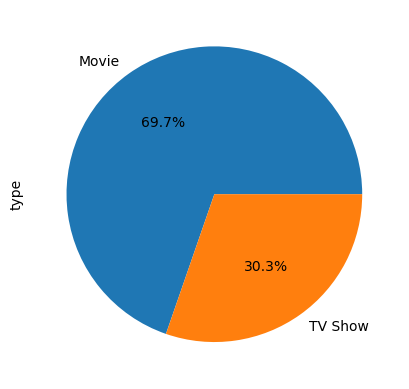

In [22]:
type_list= df.type.value_counts()
type_list[:7].plot(kind = 'pie',autopct ='%1.1f%%')